<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Programació Dinàmica</h2>
</center>
</div>

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import networkx as nx
from matplotlib import pyplot as plt
from digraph_plot import my_draw_networkx_edge_labels
import numpy as np

# Problema 1: Subseqüència Incremental més Llarga (Longest Increasing Subsequence, LIS)
Donada una seqüència de números, per exemple: $10, 22, 9, 33, 21, 50, 41, 60, 80$, volem trobar la subsequència d'elements més llarga possible que satisfaci que els seus elements estiguin ordenats de petit a gran.<br>
En el cas de l'exemple donat, la subseqüència més llarga té 6 elements: $10, 22, 33, 50, 60, 80$. Observeu però, que no és única.

In [3]:
def lis_ends_here(seq, n):
    """
    Aquesta funció ens retorna la longitud de la seqüència més llarga que acaba a la posició 'n'.
    
    Params
    ======
    :seq: Llista d'elements
    :n: Índex de la llista
    
    Returns
    =======
    :val: Longitud de la LIS suposant que finalitza a 'n'.
    """
    # Cas base, estem considerant de 1 sol element (l'únic que té).
    if n==0:
        return 1
    
    # Si n>1 podem cridar recursivament per preguntar el valor de seqüències més petites.
    # En el cas que n=3, comprovarem les seqüències que acaben en l'element 2 i recursivament 
    # les que acaben en l'element 1 i l'element 0.
    val = 1
    for i in range(n-1, -1, -1):
        # Si trobem un element menor anterior, com a mínim incrementem en 1 el valor a retornar
        if seq[i] < seq[n]:
            val = max(val, 1+lis_ends_here(seq, i))
    return val

def lis_rec(seq):
    """
    Solució recursiva al problema LIS.
    """
    # Busquem tots els candidats i escollim el maxim
    candidates = [lis_ends_here(seq, i) for i in range(len(seq))]
    print(candidates)
    return max(candidates)

In [4]:
print(lis_rec([1,2,0,9,3,5,4,6,8]))  # Retorna 6
print(lis_rec([4,1,2,1]))            # Retorna 2
print(lis_rec([5,7,1,6]))            # Retorna 2

[1, 2, 1, 3, 3, 4, 4, 5, 6]
6
[1, 1, 2, 1]
2
[1, 2, 1, 2]
2


In [5]:
def lis_dp_bottom_up(seq):
    """
    Solució al problema LIS usant programació dinàmica.
    """
    n = len(seq)
    
    # Inicialitzem una llista on anirem guardant els resultats
    dp = [1]*n
    
    # Iterem. Suposem que la seqüència màxima acaba a la posició i=0,...,n-1
    for i in range(1, n):        
        # Mirem tots els anteriors i, en cas que trobem una parella d'elements en ordre,
        # modifiquem la llista        
        for j in range(0, i):
            if seq[j] < seq[i]:
                dp[i] = max(dp[i], dp[j] + 1)
                
    return max(dp)

In [6]:
print(lis_dp_bottom_up([1,2,0,9,3,5,4,6,8])) # Retorna 6
print(lis_dp_bottom_up([4,1,2,1]))           # Retorna 2
print(lis_dp_bottom_up([5,7,1,6]))           # Retorna 2

6
2
2


# Problema 2: Problema de la motxilla
Implementeu la funció <b>knapsack</b>. Donat un nombre enter positiu, $W$, que defineix la capacitat (en Kg) màxima de la motxilla, una llista d'enters, $weights$, que definex el pes dels objectes i una llista d'enters, $values$, que indica el valor dels objectes, retorneu el valor màxim que podem ficar dins la motxilla. <br>

<b>Quina és la complexitat de l'algorisme?</b>

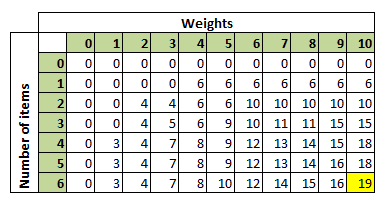<p>
    
Exemple:
- Número d'items: 6
- Preus dels ítems: 6, 4, 5, 3, 9, 7
- Pesos dels ítems: 4, 2, 3, 1, 6, 4
- Capacitat de la motxilla: 10

In [7]:
def knapsack(W, weights, values, n):
    """
    Implementa la solució al problema de la motxilla.

    Params
    ======
    :W: Capacitat màxima de la motxilla
    :weights : llista d'enters amb els pesos dels objectes
    :values : llista d'enters amb els valors dels objectes
    :n: numero d'objectes
    
    Returns
    =======
    :value: valor màxim que podem ficar dins la motxilla
    """
    
    # Inicialitzem la taula de programació dinàmica.
    # Cada cel·la (i,w) ens retornarà el valor màxim que podem obtenir considerant els 'i' primers objectes
    # tals que el seu pes total és inferior o igual a w.
    K = [[0 for x in range(W+1)] for x in range (n+1)]
    
    # La variable i ens controla els diferents objectes que tenim.
    for i in range(n+1):
        
        # La variable w ens controla el pes total que estem considerant fins al moment
        for w in range(W+1):
            
            # Si no tenim cap objecte o si el pes màxim que estem considerant és 0, no podem posar cap objecte.
            if(i==0) or (w==0):
                K[i][w] = 0
            # En el cas en que l'objecte a considerar estigui dins el pes permès, mirem si el podem afegir (si maximitza el valor)
            elif weights[i-1] <= w:
                K[i][w] = max(values[i-1] + K[i-1][w-weights[i-1]], K[i-1][w])
            
            # En cas que l'objecte no estigui dins el pes permès, no modifiquem el valor
            else:
                K[i][w] = K[i-1][w]
    
    value = K[n][W] #resultat ultima fila i ultima columna
    
    # Print
    for line in K:
        for elm in line:
            print(f'{elm:>3}',end='')
        print()
    return value

#### COMPLEXITAT DE KNAPSACK
Creem una matriu que un cop la recorrem ya trobem la solucio

primer bulce for de tamany n que es el numero de objectes a utilitzar
segon bucle for que esta anidat indica el pes maxim que cap a la motxila rang(0,W)

per tant la complexitat és:
<b>O(n*W)<br>

In [8]:
W = 4
values = [6, 10, 12]
weights = [1, 2, 3]
n = len(values)
print(knapsack(W, weights, values, n))  # Retorna 18

  0  0  0  0  0
  0  6  6  6  6
  0  6 10 16 16
  0  6 10 16 18
18


In [9]:
W = 10
values = [6,4,5,3,9,7]
weights = [4,2,3,1,6,4]
n = len(values)
print(knapsack(W, weights, values, n))  # Retorna 19

  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  6  6  6  6  6  6  6
  0  0  4  4  6  6 10 10 10 10 10
  0  0  4  5  6  9 10 11 11 15 15
  0  3  4  7  8  9 12 13 14 15 18
  0  3  4  7  8  9 12 13 14 16 18
  0  3  4  7  8 10 12 14 15 16 19
19


In [10]:
W = 40
values = [60, 100, 120]
weights = [10, 20, 30]
n = len(values)
print(knapsack(W, weights, values, n))  # Retorna 180

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60 60
  0  0  0  0  0  0  0  0  0  0 60 60 60 60 60 60 60 60 60 60100100100100100100100100100100160160160160160160160160160160160
  0  0  0  0  0  0  0  0  0  0 60 60 60 60 60 60 60 60 60 60100100100100100100100100100100160160160160160160160160160160180
180


# Problema 3: Travelling Salesman Problem

Implementeu la funció <b>travelling_salesman</b>. Seguiu una estratègia de programació dinàmica on aneu emmagatzemant càlculs realitzats prèviament.<br><br> 
<b>Quina és la complexitat de l'algorisme?</b>

In [43]:
from itertools import combinations
from collections import defaultdict
from sys import maxsize


def travelling_salesman(G):
    """
    Aquesta funció implementa la solució al TSP (Travelling Salesman Problem)
    
    Params
    ======
    :G: Un objecte de la classe nx.DiGraph
    
    Returns
    =======
    :value: El cost mínim de visitar tots els nodes
    """
    n = len(G.nodes)
    # memoization table to store the computed results for subproblems
    memo = {}

    # Convert the graph to a distance dictionary for efficient lookups
    distances = {(i, j): G.get_edge_data(i, j)['weight'] if G.has_edge(i, j) else float('inf') for i in range(n) for j in range(n)}
    
    def tsp_helper(visited, last_visited):
        # base case: all cities have been visited
        if len(visited) == n:
            return distances[last_visited, 0]  # return to the starting city

        # check if the result for this subproblem is already computed
        if (tuple(visited), last_visited) in memo:
            return memo[(tuple(visited), last_visited)]

        min_cost = maxsize

        # try all possible next cities
        for next_city in range(n):
            if next_city not in visited:
                new_visited = visited + [next_city]
                cost = distances[last_visited, next_city] + tsp_helper(new_visited, next_city)
                min_cost = min(min_cost, cost)

        # memoize the result and return it
        memo[(tuple(visited), last_visited)] = min_cost
        return min_cost

    # start the recursion with an empty set of visited cities and the starting city (0)
    return tsp_helper([0], 0)

#### COMPLEXITAT DE TSP dynamic programming

1) Creación de la matriz de distancias: <b>O(n²)</b>
2) Función tsp_helper = la recursión se realiza para todas las permutaciones posibles de ciudades no visitadas. En el peor caso, cada ciudad puede ser visitada o no, lo que lleva a: <b>O(2^n)</b>

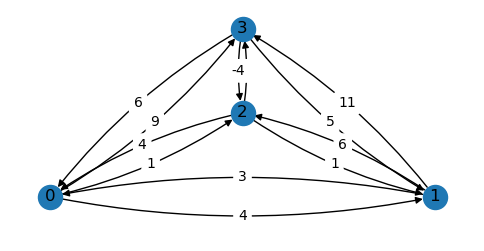

9

In [94]:
# Matriu de pesos del graf que volem crear
A = np.array([[0,4,1,9],
              [3,0,6,11],
              [4,1,0,2],
              [6,5,-4,0]])
#A = np.array([[0,3,4,6],[4,0,1,5],[1,6,0,-4],[9,11,2,0]])
#A = np.array([[0,10,15,20],[10,0,35,25],[15,35,0,30],[20,25,30,0]])
G = nx.from_numpy_array(A,create_using=nx.DiGraph)

fig = plt.figure(figsize=(6,3))

# Si voleu executar grafs amb més de 4 nodes, podeu canviar el layout a spring_layout
pos=nx.planar_layout(G) 
nx.draw(G, pos,with_labels=True,connectionstyle='arc3, rad = 0.1', ax=fig.gca())
labels = nx.get_edge_attributes(G,'weight')
my_draw_networkx_edge_labels(G,pos,edge_labels=labels, rad=0.1,rotate=False)
plt.show()

res = travelling_salesman(G)
res   # Retorna 9

# Problema 4: Train Sorting
Implementeu la funció <b>train_sorting</b>. Seguiu una estratègia de programació dinàmica .

L'Èric és enginyer. Condueix trens però també organitza els vagons dins cada tren. Prefereix posar els vagons en ordre decreixent de pes, amb el vagó més pesat al davant del tren.
Malauradament, classificar els vagons de tren no és fàcil. Els vagons arriben a l'estació de tren en un ordre predeterminat i no es pot simplement agafar un vagó i col·locar-lo en un lloc qualsevol.
Quan arriba un vagó, l'Èric pot afegir-lo al principi o al final del seu tren, o negar-se a afegir-lo. El tren resultant ha de ser el més llarg possible, però els vagons que conté han d'estar ordenats per pes.</p>
Tenint en compte els pesos dels vagons en l'ordre en què arriben, quin és el tren més llarg que pot fer l'Èric?

In [73]:
def train_sorting(values):
    """
    Calcula la longitd màxima que pot tenir el tren
    
    Params
    ======
    :values: Vector d'enters que indica el pes del vagons en l'ordre en que arriben a l'estació
    
    Returns
    =======
    :d: La longitud màxima del tren
    """
    total = len(values)
    
    trens = [1]*total
    
    min_pes = values[0]
    
    for i in range(1, total):
        for j in range(i+1):
            if(values[i] < min_pes):
                min_pes = values[i]
                trens = [x + 1 for x in trens[:i]] #augmentem 1unitat perque hem afegit al principi, aquell tindra valor 1, es l'inicial ara
            if(values[j] < values[i] and trens[j] >= trens[i]):
                trens[i] = trens[j]+1
    
    return max(trens)

In [77]:
values = [1,2,3,2,5,3,0]
print(train_sorting(values))  # Retorna 4

5


# Problema 5: Longest Palindromic Subsequence
Donada una seqüencia de text, volem trobar la longitud del palindom més llarg. Un palíndrom és una paraula que es llegeix igual d'esquerra a dreta que de dreta a esquerra.<br><br>
     Exemple: BBABCBCAB <br>
     Solució: longitud 7 ( BABCBAB )<br><br>
Trobeu una solució bottom-up amb programació dinàmica

In [ ]:
"""
# Aquí teniu la solució per força bruta
 ## FUNCIÓ :
    if i == j:
        return 1  # cas base 1, sequencia d'un únic caràcter
    
    if (seq[i] == seq[j]) and (i + 1 == j):
        return 2 # cas base 2, sequencia de dos caràcters
    
    if (seq[i] == seq[j]):
        return longest_palindrom_subsequence_brute_force(seq, i + 1, j - 1) + 2  # Si els dos elements són iguals
    
    return max(longest_palindrom_subsequence_brute_force(seq, i, j - 1),
               longest_palindrom_subsequence_brute_force(seq, i + 1, j))  # Si són diferents
"""

In [39]:
seq = 'BBABCBCAB'
print(longest_palindrom_subsequence_brute_force(seq,0,len(seq)-1))

7


In [82]:
def longest_palindrom_subsequence_dp(seq):
    """
    Algorisme usant una estratègia bottom-up
    
    Params
    ======
    :text: El text que estem considerant
    
    Returns
    =======
    :d: La longitud del palindrom més llarg
    """
    n = len(seq)
    dp = [[0] * n for i in range(n)]
    
    for i in range(n):
        dp[i][i] = 1 # la daigonal son subsequencies de 1
        
    # Matrix triangular superior
    for cl in range(2, n + 1):
        for i in range(n - cl + 1):
            j = i + cl - 1
            if seq[i] == seq[j] and cl == 2:
                dp[i][j] = 2
            elif seq[i] == seq[j]:
                dp[i][j] = dp[i + 1][j - 1] + 2
            else:
                dp[i][j] = max(dp[i][j - 1], dp[i + 1][j])
                
    return dp[0][n - 1]


In [83]:
seq = 'BBABCBCAB'
print(longest_palindrom_subsequence_dp(seq))

7
